In [11]:
from skyfield import api, almanac
from skyfield.nutationlib import iau2000b
from datetime import datetime, timedelta
from dateutil import tz
from pytz import timezone
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import numpy as np
cet = timezone('CET')

In [12]:
# initialise skyfield
ts=api.load.timescale()
e=api.load('de421.bsp')
earth=e['earth']
sun=e['sun']

In [13]:
def alt_sun(time):
    # Altitude and azimuth in the sky of a
    # specific geographic location
    #place=earth+api.Topos('42.3583 N', '71.0603 W')
    place=earth+api.Topos('46.4782 N', '6.2388 E')
    astro=place.at(ts.tt(jd=time)).observe(sun)
    app = astro.apparent()
    alt, az, distance = app.altaz()
    #print(time, ': ', alt, ': ', az)
    return(alt.degrees)

In [14]:
now=datetime.now()
year=now.strftime("%Y")
month=now.strftime("%m")
day=now.strftime("%d")
h0=datetime.strptime(str(year)+str(month)+str(day),'%Y%m%d')

In [15]:
h=h0
while h.day < (h0.day)+1:
    h=h+timedelta(minutes=10)
    #print(h)

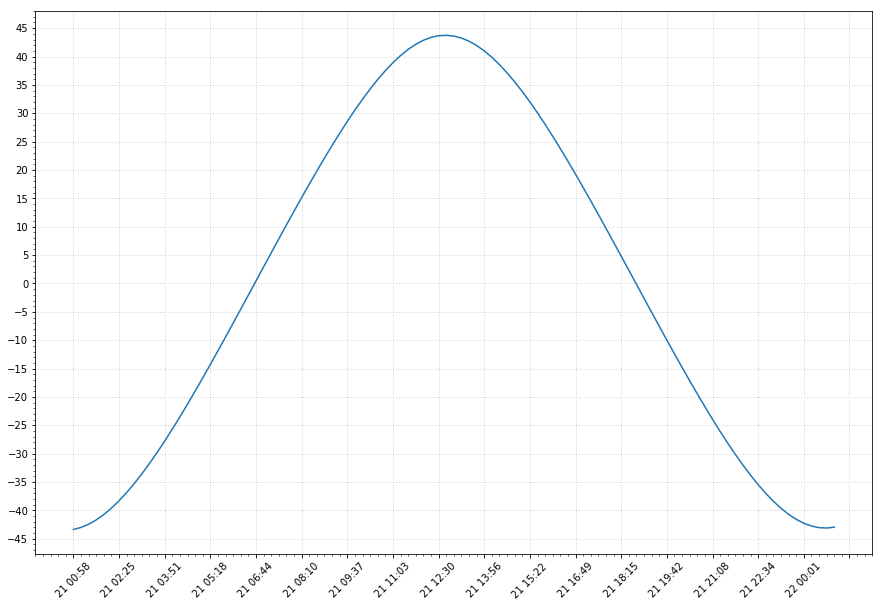

In [16]:
start=ts.tt(int(year),int(month),int(day),0,0,0).tdb #julian date
end=start+1
#print(start,end)
tj=start
x=list()
y=list()
while tj <= end:
    #print(ts.tt_jd(tj).utc_iso(),alt_sun(tj))
    x.append(ts.tt_jd(tj).astimezone(cet).strftime("%d %H:%M"))
    y.append(alt_sun(tj))
    tj+=0.01
plt.figure(figsize=(15,10))
plt.plot(x,y)
#ax=plt.axes()
ax=plt.gca() # returns the current active axes object instead of creating a new one.
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=45)
plt.grid(which='major',axis='x',color='lightgray',linestyle=':',linewidth=1)
plt.grid(which='major',axis='y',color='lightgray',linestyle=':',linewidth=1)
plt.show()